In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [40]:
################################################################
## EVENTS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
events= pd.read_csv('../../events.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (EVENTS)
events['wifi'] = events['wifi'].fillna(False).astype(bool)
events['connection_type'] = events['connection_type'].astype('category')
events['trans_id'] = events['trans_id'].astype('category')
events['date'] = pd.to_datetime(events['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
events['mes'] = events['date'].dt.month
events['dia'] = events['date'].dt.day
events['hora'] = events['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
events['nombre_dia'] = events['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
events.loc[events.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
events.loc[events.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
events.loc[events.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
events.loc[events.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
events.loc[events.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
events.loc[events.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
events.loc[events.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DdiasemanaE LOS MESES.
events['nombre_mes'] = ''
events.loc[events.mes == 1, 'nombre_mes'] = 'ENERO'
events.loc[events.mes == 2, 'nombre_mes'] = 'FEBRERO'
events.loc[events.mes == 3, 'nombre_mes'] = 'MARZO'
events.loc[events.mes == 4, 'nombre_mes'] = 'ABRIL'
events.loc[events.mes == 5, 'nombre_mes'] = 'MAYO'
events.loc[events.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
events['hora_madrugada'] = 0
events.loc[((events.hora > -1) & (events.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
events['hora_maniana'] = 0
events.loc[((events.hora > 6) & (events.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
events['hora_almuerzo'] = 0
events.loc[((events.hora > 11) & (events.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
events['hora_tarde'] = 0
events.loc[((events.hora > 13) & (events.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
events['hora_noche'] = 0
events.loc[((events.hora > 18) & (events.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
events['nombre_dia'] = events['nombre_dia'].astype('category')
events['nombre_mes'] = events['nombre_mes'].astype('category')
################################################################
################################################################

In [ ]:
aplicaciones_relevantes = list([7,9,10,16,8])
events_topAplicaciones_5 = events[events['application_id'].isin(aplicaciones_relevantes)]
events_topAplicaciones_5['application_id'].value_counts()

In [ ]:
events_topAplicaciones_5['event_id'].value_counts()
eventos_aplicaciones_relevantes = list([22,80,81,1,513])
topEventos_topAplicaciones_5 = events_topAplicaciones_5[events_topAplicaciones_5['event_id'].isin(eventos_aplicaciones_relevantes)]
topEventos_topAplicaciones_5['evento'] = topEventos_topAplicaciones_5['event_id']
topEventos_topAplicaciones_5['aplicacion'] = topEventos_topAplicaciones_5['application_id']
topEventos_topAplicaciones_5['event_id'].value_counts()

In [ ]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="application_id", hue="evento", data=topEventos_topAplicaciones_5, palette="hls", order=[7,9,10,16,8])
g.set_title("Eventos para las aplicaciones relevantes", fontsize=35)
g.set_xlabel("Aplicacion", fontsize=30)
g.set_ylabel("Cantidad de eventos", fontsize=30)

In [14]:
######################################################################################################################
######################################################################################################################

In [16]:
events['event_id'].value_counts()
# eventos principales
#22     618228
#31     417070
#161    217846
#1      157812
#138    100039
eventos_relevantes = list([22,31,161,1,138])
topEventos = events[events['event_id'].isin(eventos_relevantes)]
topEventos['event_id'].value_counts()

22     618228
31     417070
161    217846
1      157812
138    100039
Name: event_id, dtype: int64

In [25]:
topEventos['application_id'].value_counts()
# aplicaciones principales para los eventos principales.
#66     322334
#64     214353
#145    207479
#57     112246
#63     101708
aplicaciones_eventos_relevantes = list([66,64,145,57,63])
topAplicaciones_topEventos_5 = topEventos[topEventos['application_id'].isin(aplicaciones_eventos_relevantes)]
topAplicaciones_topEventos_5['evento'] = topAplicaciones_topEventos_5['event_id']
topAplicaciones_topEventos_5['aplicacion'] = topAplicaciones_topEventos_5['application_id']
topAplicaciones_topEventos_5['application_id'].value_counts()

66     322334
64     214353
145    207479
57     112246
63     101708
Name: application_id, dtype: int64

Text(0,0.5,'Cantidad de sucesos')

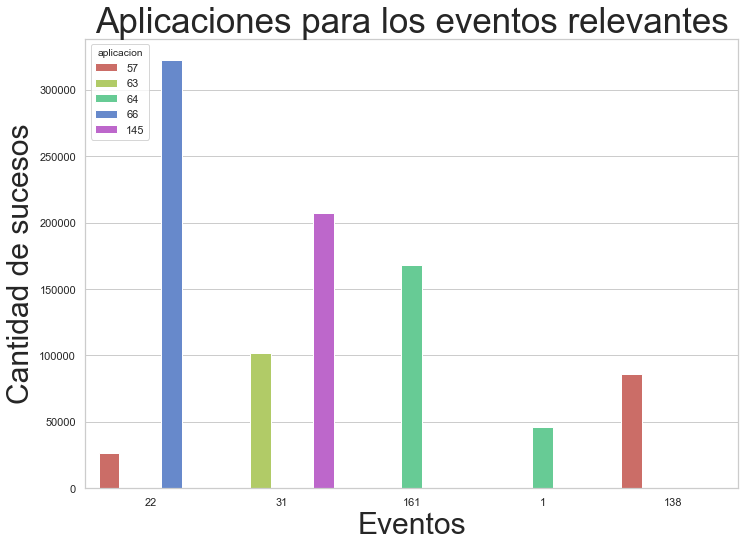

In [28]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="evento", hue="aplicacion", data=topAplicaciones_topEventos_5, palette="hls", order=[22,31,161,1,138])
g.set_title("Aplicaciones para los eventos relevantes", fontsize=35)
g.set_xlabel("Eventos", fontsize=30)
g.set_ylabel("Cantidad de sucesos", fontsize=30)

In [29]:
######################################################################################################################
######################################################################################################################

Text(81.8,0.5,'Horario')

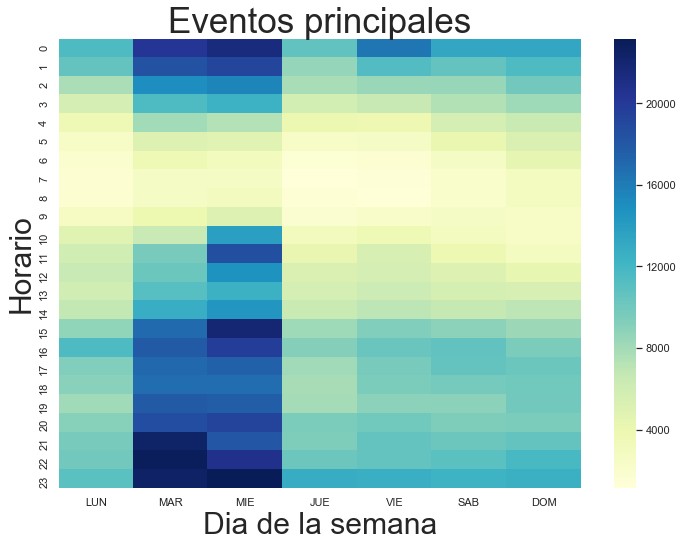

In [30]:
eventosID_relevantes = list([22,31,161,1,138])
# eventos principales
#22     618228
#31     417070
#161    217846
#1      157812
#138    100039
df_heat = events[events["event_id"].isin(eventosID_relevantes)].groupby(["hora", "nombre_dia"])["event_id"].size().reset_index()
df_heat['nombre_dia'] = pd.Categorical(df_heat['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])

df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
df_heat.sortlevel(level=0, inplace=True)

for_heatmap = df_heat.pivot_table(index='hora', columns='nombre_dia', values='event_id', aggfunc='sum')
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Eventos principales", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)

Text(81.8,0.5,'Horario')

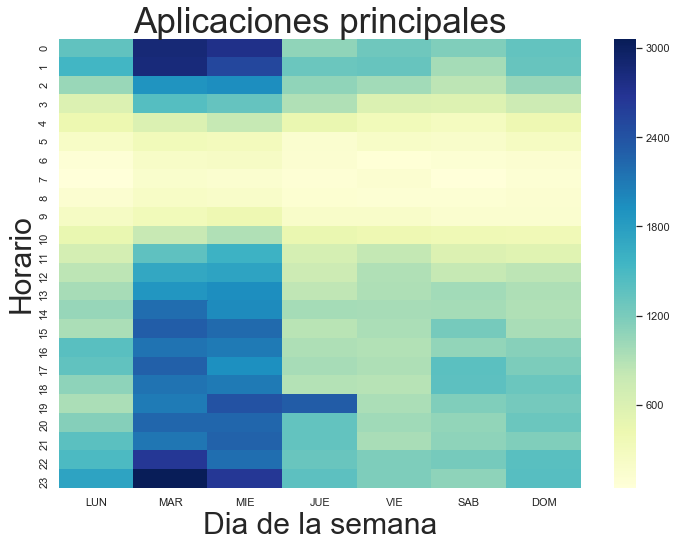

In [31]:
aplicaciones_relevantes = list([7,9,10,16,8])
events_top = events[events['application_id'].isin(aplicaciones_relevantes)]

df_heat = events_top.groupby(["hora", "nombre_dia"])["application_id"].size().reset_index()
df_heat['nombre_dia'] = pd.Categorical(df_heat['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])

df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
df_heat.sortlevel(level=0, inplace=True)

for_heatmap = df_heat.pivot_table(index='hora', columns='nombre_dia', values='application_id', aggfunc='sum')

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Aplicaciones principales", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)

In [6]:
eventosID_relevantes = list([22,31,161,1,138])
eventos_top5 = events[events["event_id"].isin(eventosID_relevantes)]

Text(27.3615,0.5,'Cantidad')

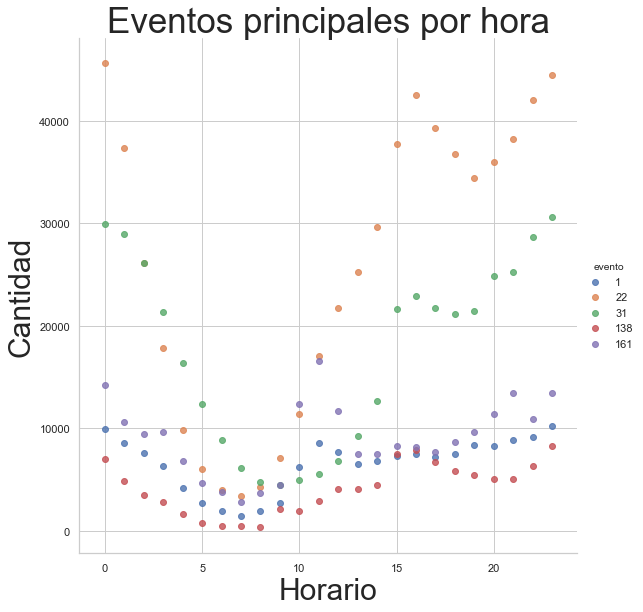

In [7]:
crecimiento_eventos = eventos_top5.groupby(['event_id','hora']).count()[['date']].reset_index()
#ax = sns.lineplot(x="hora", y="date", hue="event_id", markers=True, dashes=False, data=crecimiento_eventos)
#ax = sns.lineplot(x="hora", y="date",hue="event_id", data=crecimiento_eventos)
#ax = sns.lineplot(x="hora", y="date", hue="event_id", err_style="bars", ci=68, data=crecimiento_eventos)


# Tamaño para hojas A4.
crecimiento_eventos['evento'] = crecimiento_eventos['event_id']
sns.lmplot(x='hora', y='date', hue='evento', data=crecimiento_eventos, fit_reg=False, size=8)
ax = plt.gca()
ax.set_title("Eventos principales por hora", fontsize=35)
ax.set_xlabel("Horario",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

In [32]:
######################################################################################################################
######################################################################################################################

In [3]:
################################################################
## INSTALLS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
installs = pd.read_csv('../../installs.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (INSTALLS)
installs['kind'] = installs['kind'].astype('category')
installs['user_agent'] = installs['user_agent'].astype('category')
installs['session_user_agent'] = installs['session_user_agent'].astype('category')
installs['created'] = pd.to_datetime(installs['created'], infer_datetime_format=True)
installs['trans_id'] = installs['trans_id'].astype('category')
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
installs['mes'] = installs['created'].dt.month
installs['dia'] = installs['created'].dt.day
installs['hora'] = installs['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
installs['nombre_dia'] = installs['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
installs.loc[installs.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
installs.loc[installs.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
installs.loc[installs.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
installs.loc[installs.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
installs.loc[installs.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
installs.loc[installs.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
installs.loc[installs.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
installs['nombre_mes'] = ''
installs.loc[installs.mes == 1, 'nombre_mes'] = 'ENERO'
installs.loc[installs.mes == 2, 'nombre_mes'] = 'FEBRERO'
installs.loc[installs.mes == 3, 'nombre_mes'] = 'MARZO'
installs.loc[installs.mes == 4, 'nombre_mes'] = 'ABRIL'
installs.loc[installs.mes == 5, 'nombre_mes'] = 'MAYO'
installs.loc[installs.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
installs['hora_madrugada'] = 0
installs.loc[((installs.hora > -1) & (installs.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
installs['hora_maniana'] = 0
installs.loc[((installs.hora > 6) & (installs.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
installs['hora_almuerzo'] = 0
installs.loc[((installs.hora > 11) & (installs.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
installs['hora_tarde'] = 0
installs.loc[((installs.hora > 13) & (installs.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
installs['hora_noche'] = 0
installs.loc[((installs.hora > 18) & (installs.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
installs['nombre_dia'] = installs['nombre_dia'].astype('category')
installs['nombre_mes'] = installs['nombre_mes'].astype('category')
################################################################
################################################################

In [35]:
installs['application_id'].value_counts()

7     947
9     731
10    389
16    362
8     328
2     174
29     97
20     95
6      35
1      34
26     28
34     28
15     20
0      18
3      17
28     17
12     15
18     14
24     13
17     13
14     13
21      7
5       3
13      3
33      2
30      2
19      2
32      2
36      1
4       1
23      1
Name: application_id, dtype: int64

Text(81.8,0.5,'Horario')

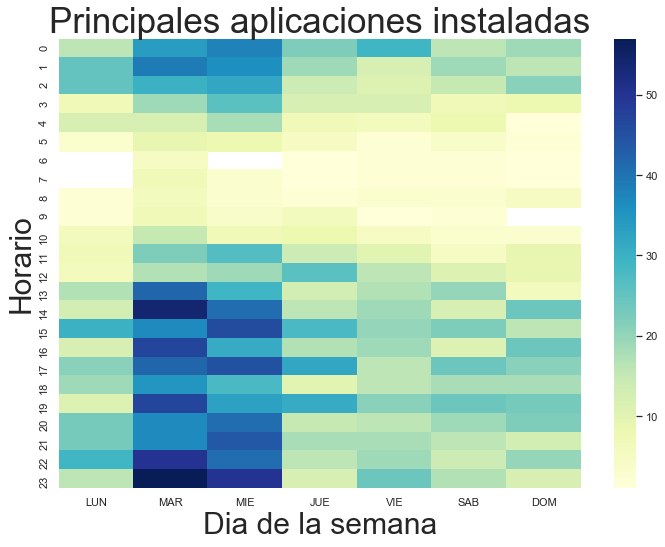

In [36]:
aplicaciones_relevantes = list([7,9,10,16,8,2])
installs_top = installs[installs['application_id'].isin(aplicaciones_relevantes)]

df_heat = installs_top.groupby(["hora", "nombre_dia"])["application_id"].size().reset_index()
df_heat['nombre_dia'] = pd.Categorical(df_heat['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])

df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
df_heat.sortlevel(level=0, inplace=True)

for_heatmap = df_heat.pivot_table(index='hora', columns='nombre_dia', values='application_id', aggfunc='sum')

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Principales aplicaciones instaladas", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)

In [4]:
################################################################
## CLICKS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
clicks = pd.read_csv('../../clicks.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (CLICKS)
clicks['created'] = pd.to_datetime(clicks['created'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
clicks['mes'] = clicks['created'].dt.month
clicks['dia'] = clicks['created'].dt.day
clicks['hora'] = clicks['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
clicks['nombre_dia'] = clicks['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
clicks.loc[clicks.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
clicks.loc[clicks.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
clicks.loc[clicks.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
clicks.loc[clicks.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
clicks.loc[clicks.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
clicks.loc[clicks.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
clicks.loc[clicks.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
clicks['nombre_mes'] = ''
clicks.loc[clicks.mes == 1, 'nombre_mes'] = 'ENERO'
clicks.loc[clicks.mes == 2, 'nombre_mes'] = 'FEBRERO'
clicks.loc[clicks.mes == 3, 'nombre_mes'] = 'MARZO'
clicks.loc[clicks.mes == 4, 'nombre_mes'] = 'ABRIL'
clicks.loc[clicks.mes == 5, 'nombre_mes'] = 'MAYO'
clicks.loc[clicks.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
clicks['hora_madrugada'] = 0
clicks.loc[((clicks.hora > -1) & (clicks.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
clicks['hora_maniana'] = 0
clicks.loc[((clicks.hora > 6) & (clicks.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
clicks['hora_almuerzo'] = 0
clicks.loc[((clicks.hora > 11) & (clicks.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
clicks['hora_tarde'] = 0
clicks.loc[((clicks.hora > 13) & (clicks.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
clicks['hora_noche'] = 0
clicks.loc[((clicks.hora > 18) & (clicks.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
clicks['nombre_dia'] = clicks['nombre_dia'].astype('category')
clicks['nombre_mes'] = clicks['nombre_mes'].astype('category')
################################################################
################################################################

In [5]:
################################################################
## AUCTIONS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
auctions = pd.read_csv('../../auctions.csv',nrows=5000000)
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (AUCTIONS)
auctions['date'] = pd.to_datetime(auctions['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
auctions['mes'] = auctions['date'].dt.month
auctions['dia'] = auctions['date'].dt.day
auctions['hora'] = auctions['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
auctions['nombre_dia'] = auctions['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
auctions.loc[auctions.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
auctions.loc[auctions.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
auctions.loc[auctions.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
auctions.loc[auctions.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
auctions.loc[auctions.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
auctions.loc[auctions.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
auctions.loc[auctions.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
auctions['nombre_mes'] = ''
auctions.loc[auctions.mes == 1, 'nombre_mes'] = 'ENERO'
auctions.loc[auctions.mes == 2, 'nombre_mes'] = 'FEBRERO'
auctions.loc[auctions.mes == 3, 'nombre_mes'] = 'MARZO'
auctions.loc[auctions.mes == 4, 'nombre_mes'] = 'ABRIL'
auctions.loc[auctions.mes == 5, 'nombre_mes'] = 'MAYO'
auctions.loc[auctions.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
auctions['hora_madrugada'] = 0
auctions.loc[((auctions.hora > -1) & (auctions.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
auctions['hora_maniana'] = 0
auctions.loc[((auctions.hora > 6) & (auctions.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
auctions['hora_almuerzo'] = 0
auctions.loc[((auctions.hora > 11) & (auctions.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
auctions['hora_tarde'] = 0
auctions.loc[((auctions.hora > 13) & (auctions.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
auctions['hora_noche'] = 0
auctions.loc[((auctions.hora > 18) & (auctions.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
auctions['nombre_dia'] = auctions['nombre_dia'].astype('category')
auctions['nombre_mes'] = auctions['nombre_mes'].astype('category')
################################################################
################################################################

In [14]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 17 columns):
auction_type_id    float64
country            int64
date               datetime64[ns]
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
mes                int64
dia                int64
hora               int64
nombre_dia         category
nombre_mes         category
hora_madrugada     int64
hora_maniana       int64
hora_almuerzo      int64
hora_tarde         int64
hora_noche         int64
dtypes: category(2), datetime64[ns](1), float64(1), int64(13)
memory usage: 581.7 MB


In [6]:
#clicks['timeToClick'].value_counts()
#clicks_group = clicks.groupby('timeToClick').count()[['advertiser_id']].reset_index()

#clicks['secondsToClick'] = np.floor(clicks['timeToClick'])
#clicks = clicks[clicks['secondsToClick'] < 61.0]
events['hora'].value_counts()


0     181072
23    175714
1     159288
22    154274
21    142695
16    140399
17    135168
15    134192
2     133891
20    133759
18    127056
19    126855
3     102469
14    101452
13     89836
12     86290
11     82888
4      69027
10     58244
5      46961
9      32899
6      32295
8      24076
7      23623
Name: hora, dtype: int64

In [7]:
installs['hora'].value_counts()

17    233
22    229
15    220
23    212
19    211
14    201
21    198
0     198
1     191
20    188
16    186
2     174
18    170
13    169
12    130
11    116
3     115
4      76
10     63
5      38
8      28
9      27
7      21
6      18
Name: hora, dtype: int64

In [8]:
auctions['hora'].value_counts()

22    346574
23    336318
17    315699
2     313104
14    295736
20    284928
21    274593
0     263036
18    254425
1     253619
15    247837
3     234399
16    211951
19    197173
4     184159
10    157227
5     154203
12    150189
13    148467
11    115946
6     102650
7      57205
9      50466
8      50096
Name: hora, dtype: int64

Text(0,0.5,'Cantidad')

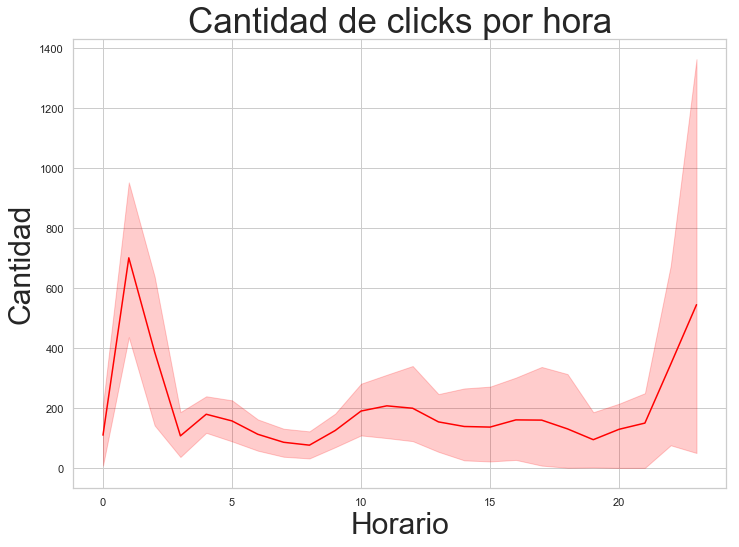

In [31]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

clicksASD = clicks.groupby(['nombre_dia','hora']).count()[['advertiser_id']].reset_index()
sns.lineplot(x="hora", y="advertiser_id", data=clicksASD, color='red')
ax = plt.gca()
ax.set_title("Cantidad de clicks por hora", fontsize=35)
ax.set_xlabel("Horario",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

Text(0,0.5,'Cantidad')

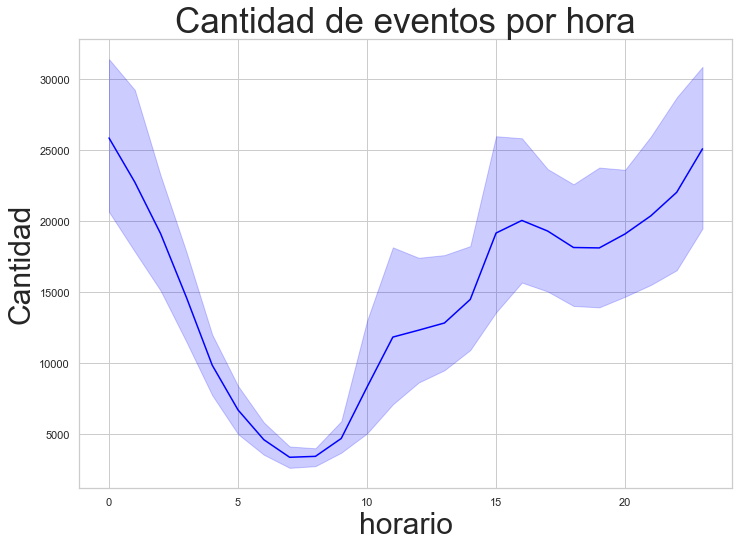

In [32]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

eventsASD = events.groupby(['nombre_dia','hora']).count()[['event_id']].reset_index()
sns.lineplot(x="hora", y="event_id", data=eventsASD, color='blue')
ax = plt.gca()
ax.set_title("Cantidad de eventos por hora", fontsize=35)
ax.set_xlabel("horario",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

Text(0,0.5,'Cantidad')

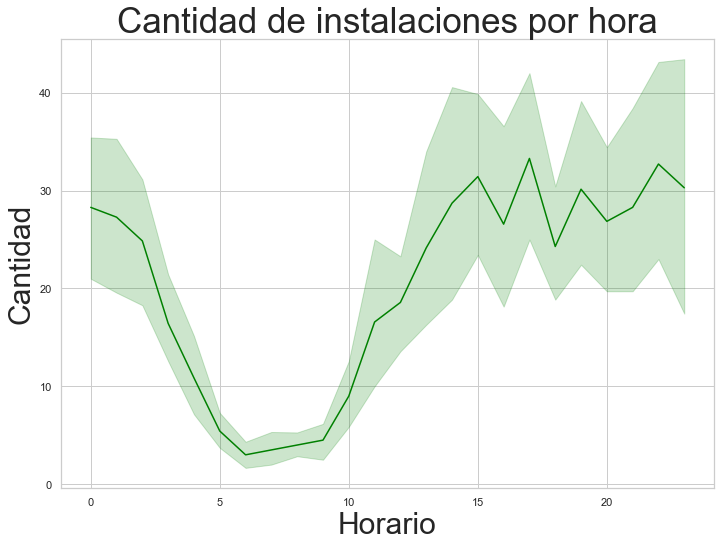

In [33]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

installsASD = installs.groupby(['nombre_dia','hora']).count()[['application_id']].reset_index()
sns.lineplot(x="hora", y="application_id", data=installsASD, color='green')
ax = plt.gca()
ax.set_title("Cantidad de instalaciones por hora", fontsize=35)
ax.set_xlabel("Horario",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

Text(0,0.5,'Cantidad')

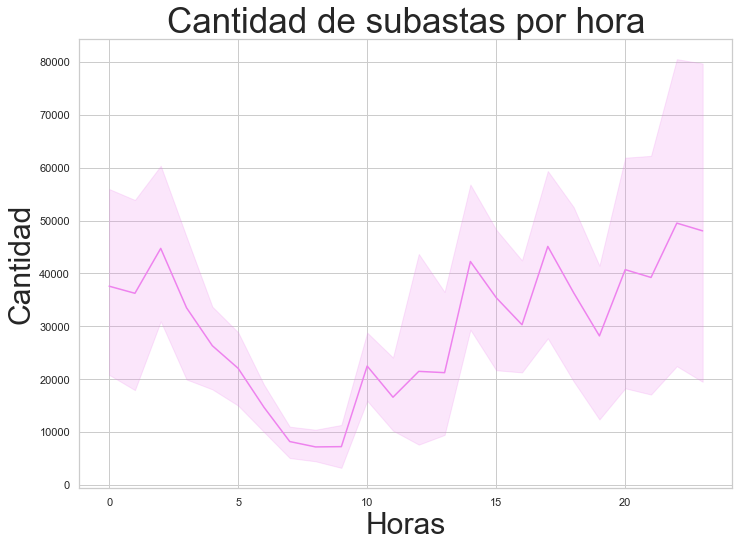

In [34]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

auctionsASD = auctions.groupby(['nombre_dia','hora']).count()[['device_id']].reset_index()
ax = sns.lineplot(x="hora", y="device_id", data=auctionsASD, color='violet')
plt.gca()
ax.set_title("Cantidad de subastas por hora", fontsize=35)
ax.set_xlabel("Horas",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

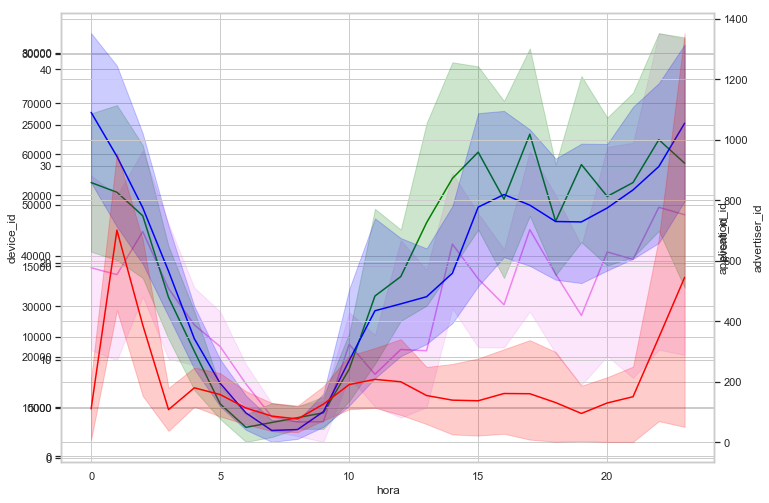

In [25]:


# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

auctionsASD = auctions.groupby(['nombre_dia','hora']).count()[['device_id']].reset_index()
ax = sns.lineplot(x="hora", y="device_id", data=auctionsASD, color='violet')
ax2 = ax.twinx()
installsASD = installs.groupby(['nombre_dia','hora']).count()[['application_id']].reset_index()
ax2 = sns.lineplot(x="hora", y="application_id", data=installsASD, color='green')
ax3 = ax2.twinx()
eventsASD = events.groupby(['nombre_dia','hora']).count()[['event_id']].reset_index()
ax3 = sns.lineplot(x="hora", y="event_id", data=eventsASD, color='blue')
ax4 = ax3.twinx()
clicksASD = clicks.groupby(['nombre_dia','hora']).count()[['advertiser_id']].reset_index()
ax4 = sns.lineplot(x="hora", y="advertiser_id", data=clicksASD, color='red')

In [ ]:

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

clicksASD = clicks.groupby(['source_id','secondsToClick']).count()[['advertiser_id']].reset_index()
ax = sns.lineplot(x="secondsToClick", y="advertiser_id", data=clicksASD, color='red')
ax2 = ax.twinx()
ax2 = sns.lineplot(x="secondsToClick", y="advertiser_id", data=clicksASD, color='teal')

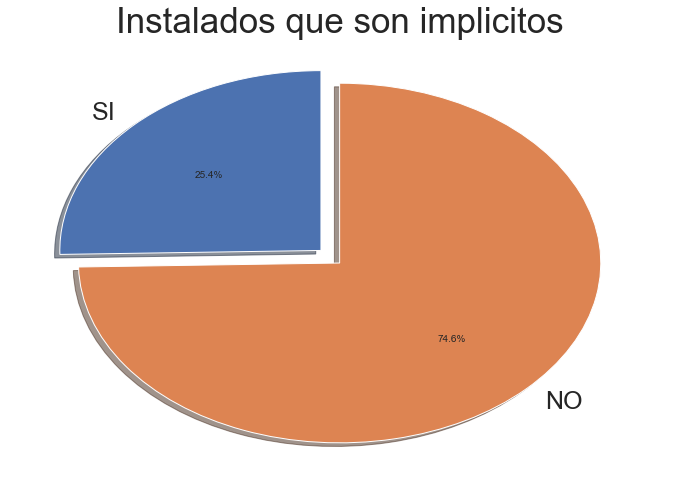

In [39]:
## OBTENEMOS AQUELLOS EVENTOS QUE TIENEN UN NABVEGADOR ASIGNADOS.
si_implicit = installs[installs['implicit'] == True]
no_implicit = installs[installs['implicit'] != True]
## SOLO HA BASRTADO DIFERENCIARLOS EN CHROME O EN OTROS PUESTO QUE LOS DEMÁS SON DESPRECIABLES.
sizes = [si_implicit.implicit.count(), no_implicit.implicit.count()]
nombres = ['SI', 'NO']
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Instalados que son implicitos', fontsize=35)
patches, texts, autotexts = plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
texts[0].set_fontsize(25)
texts[1].set_fontsize(25)
plt.show()

In [ ]:
pais_grafico_data = eventos[isNotUnknown]['pais_grafico_visitas'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.barplot(x=pais_grafico_data.values, y=pais_grafico_data.index, orient='h')
g.set_xscale('log')
g.set_title(u"Top 5 de cantidad visitas por país", fontsize=35)
g.set_xlabel(u"Cantidad de visitas", fontsize=30)
g.set_ylabel(u"País", fontsize=30)

In [45]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 32 columns):
date                  datetime64[ns]
event_id              int64
ref_type              int64
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              category
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  bool
connection_type       category
ip_address            int64
device_language       float64
mes                   int64
dia                   int64
hora                  int64
nombre_dia            category
nombre_mes            category
hora_madrugada        int64
hora_maniana          int64
hora_almuerzo         int64
hora_ta

In [50]:
data = events['device_brand'].value_counts().head(5)

3.083059e+17    579861
3.812621e+18    115538
2.208835e+18    113636
2.987569e+18    107472
2.523246e+18     94672
Name: device_brand, dtype: int64

Text(0,0.5,u'Marcas')

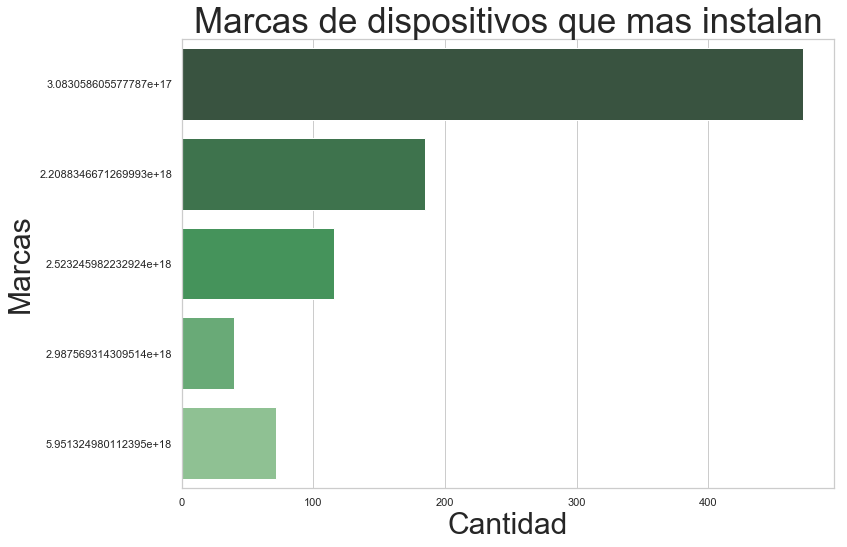

In [90]:
sns.set(style="whitegrid", color_codes=True)

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

data = installs['device_brand'].value_counts().head(5)
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g = sns.barplot(x=data, y=data.index, palette=np.array(pal[::-1])[rank], orient = 'h')

g.set_title(u"Marcas de dispositivos que mas instalan", fontsize=35)
g.set_xlabel(u"Cantidad", fontsize=30)
g.set_ylabel(u"Marcas", fontsize=30)

In [77]:
data = events.groupby("device_model").size().head(2)
data

device_model
9.530216e+14    1
1.903498e+15    2
dtype: int64

In [79]:
events["device_model"].value_counts()

2.331947e+18    210697
7.787531e+18     74780
9.149036e+18     66279
2.066431e+17     60168
4.445252e+18     56241
1.754528e+18     53850
8.163783e+18     48814
7.116343e+18     44598
2.928262e+18     41494
5.990117e+18     40935
1.267677e+18     38870
1.187661e+17     38629
3.624089e+18     37489
4.281729e+18     36006
6.598699e+18     30656
1.181318e+18     26846
6.026543e+18     26460
3.686067e+17     26275
1.540907e+18     25154
2.435450e+18     24645
4.545490e+18     24201
4.689550e+18     22497
8.604122e+18     22268
1.764701e+18     21661
4.430579e+18     20316
2.136935e+18     19213
6.882415e+18     19122
8.535198e+18     18648
8.733769e+18     17953
4.349816e+18     17790
                 ...  
7.041347e+17         1
4.299720e+17         1
7.913931e+18         1
6.348714e+18         1
7.068163e+18         1
3.999960e+18         1
5.453186e+16         1
1.362975e+18         1
3.307099e+18         1
1.705521e+17         1
2.434656e+18         1
5.950607e+18         1
6.189271e+1

Text(0,0.5,u'Modelos')

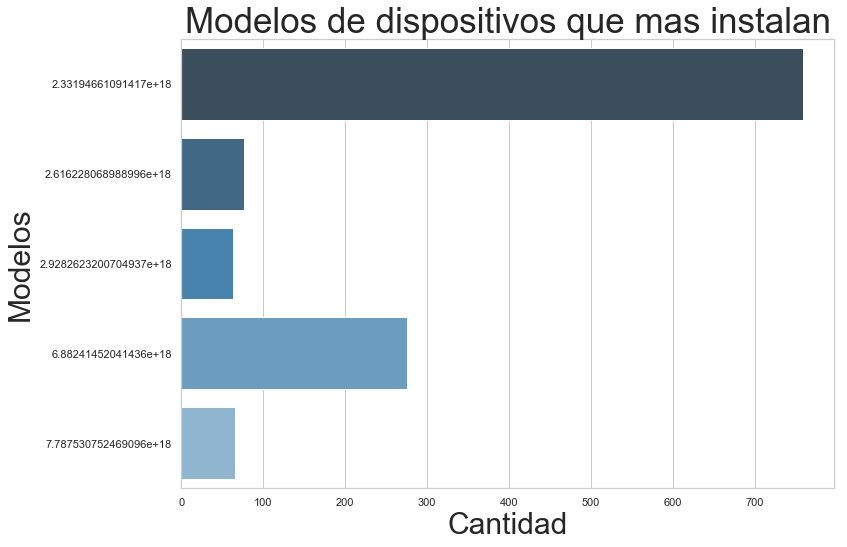

In [91]:

sns.set(style="whitegrid", color_codes=True)

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

data = installs['device_model'].value_counts().head(5)

pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g = sns.barplot(x=data, y=data.index, palette=np.array(pal[::-1])[rank], orient = 'h')

g.set_title(u"Modelos de dispositivos que mas instalan", fontsize=35)
g.set_xlabel(u"Cantidad", fontsize=30)
g.set_ylabel(u"Modelos", fontsize=30)

Text(0,0.5,u'Marcas')

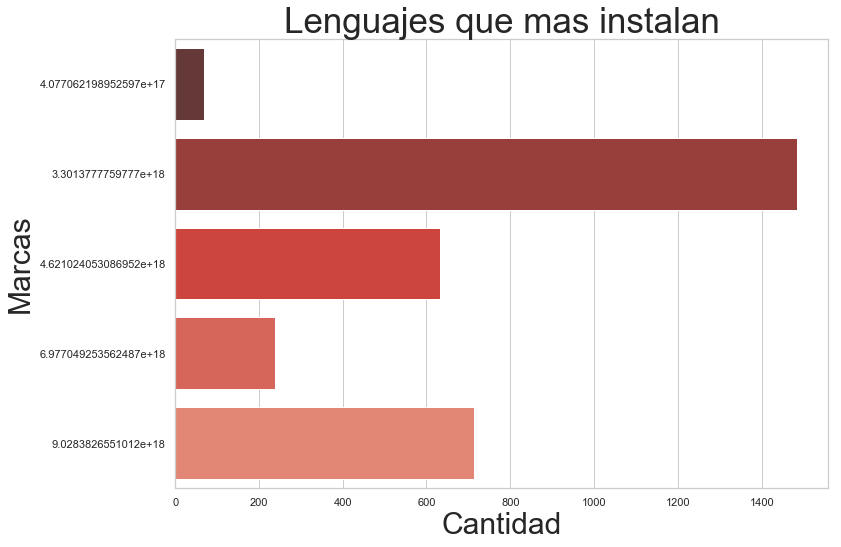

In [97]:
sns.set(style="whitegrid", color_codes=True)

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

data = installs['device_language'].value_counts().head(5)
pal = sns.color_palette("Reds_d", len(data))
rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g = sns.barplot(x=data, y=data.index, palette=np.array(pal[::-1])[rank], orient = 'h')

g.set_title(u"Lenguajes que mas instalan", fontsize=35)
g.set_xlabel(u"Cantidad", fontsize=30)
g.set_ylabel(u"Marcas", fontsize=30)

In [88]:

data = installs['user_agent'].value_counts().head(5)

In [101]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 28 columns):
created               3412 non-null datetime64[ns]
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null category
user_agent            1729 non-null category
event_uuid            865 non-null object
kind                  865 non-null category
wifi                  1729 non-null object
trans_id              6 non-null category
ip_address            3412 non-null int64
device_language       3378 non-null float64
mes                   3412 non-null int64
dia                   3412 non-null int64
hora                  3412 non-n

In [102]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 32 columns):
date                  datetime64[ns]
event_id              int64
ref_type              int64
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              category
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  bool
connection_type       category
ip_address            int64
device_language       float64
mes                   int64
dia                   int64
hora                  int64
nombre_dia            category
nombre_mes            category
hora_madrugada        int64
hora_maniana          int64
hora_almuerzo         int64
hora_ta

ValueError: Violets_d is not a valid palette name

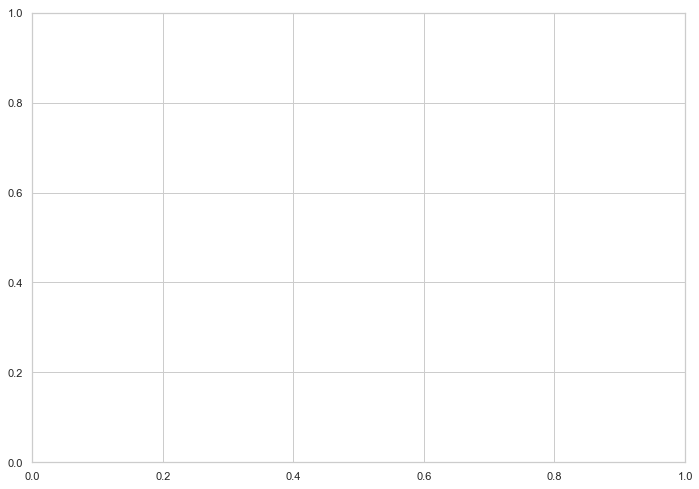

In [103]:
sns.set(style="whitegrid", color_codes=True)

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

data = events['device_city'].value_counts().head(5)
pal = sns.color_palette("Violets_d", len(data))
rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g = sns.barplot(x=data, y=data.index, palette=np.array(pal[::-1])[rank], orient = 'h')

g.set_title(u"Lenguajes que mas instalan", fontsize=35)
g.set_xlabel(u"Cantidad", fontsize=30)
g.set_ylabel(u"Marcas", fontsize=30)